In [17]:
from faster_whisper import WhisperModel
from faster_whisper import vad
import torch

In [18]:
import io
import numpy as np
torch.set_num_threads(1)
import torchaudio
import matplotlib
import matplotlib.pylab as plt
torchaudio.set_audio_backend("soundfile")
import pyaudio

C:\Users\frank\AppData\Local\Temp\ipykernel_17532\393523855.py:7: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


In [19]:
vadmodel, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True)

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to C:\Users\frank/.cache\torch\hub\master.zip


In [25]:

# Taken from utils_vad.py
def validate(model,
             inputs: torch.Tensor):
    with torch.no_grad():
        outs = model(inputs)
    return outs

# Provided by Alexander Veysov
def int2float(sound):
    abs_max = np.abs(sound).max()
    sound = sound.astype('float32')
    if abs_max > 0:
        sound *= 1/32768
    sound = sound.squeeze()  # depends on the use case
    return sound

In [23]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
SAMPLE_RATE = 16000
CHUNK = int(SAMPLE_RATE / 10)

audio = pyaudio.PyAudio()

In [28]:
num_samples = 1536
frames_to_record = 100

Started Recording
Stopped the recording


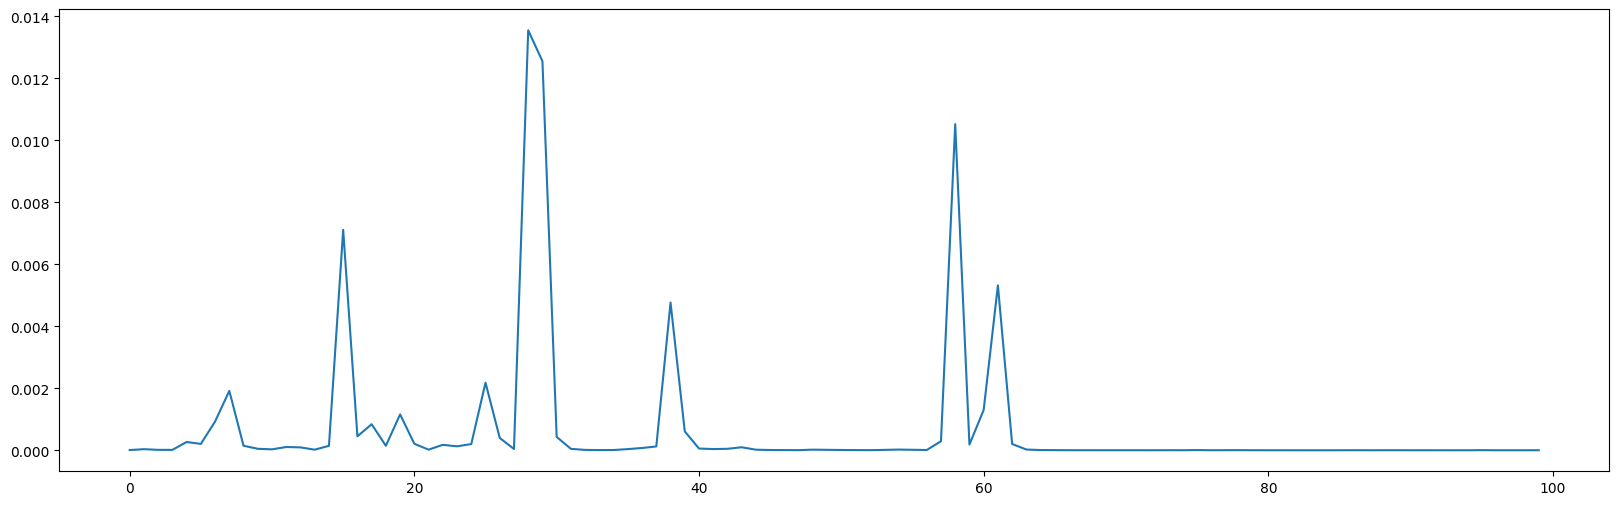

In [29]:

stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=SAMPLE_RATE,
                    input=True,
                    frames_per_buffer=CHUNK)
data = []
voiced_confidences = []

print("Started Recording")
for i in range(0, frames_to_record):
    
    audio_chunk = stream.read(num_samples)
    
    # in case you want to save the audio later
    data.append(audio_chunk)
    
    audio_int16 = np.frombuffer(audio_chunk, np.int16);

    audio_float32 = int2float(audio_int16)
    
    # get the confidences and add them to the list to plot them later
    new_confidence = vadmodel(torch.from_numpy(audio_float32), 16000).item()
    voiced_confidences.append(new_confidence)
    
print("Stopped the recording")

# plot the confidences for the speech
plt.figure(figsize=(20,6))
plt.plot(voiced_confidences)
plt.show()

In [4]:
model_size = "tiny.en"

In [5]:
model = WhisperModel(model_size, device="cpu", compute_type="int8")

In [6]:
segments, info = model.transcribe("chunks/test.wav", beam_size=5)

In [7]:
for segment in segments:
    print(segment)

Segment(id=1, seek=2600, start=0.0, end=7.0, text=' The birch canoes slid on the smooth planks, glue the sheet to the dark blue background.', tokens=[50363, 383, 35122, 354, 460, 3028, 27803, 319, 262, 7209, 1410, 591, 11, 22749, 262, 9629, 284, 262, 3223, 4171, 4469, 13, 50713], temperature=0.0, avg_logprob=-0.25842314483003415, compression_ratio=1.5789473684210527, no_speech_prob=0.06872095167636871, words=None)
Segment(id=2, seek=2600, start=7.0, end=10.0, text=' It is easy to tell the depth of a well.', tokens=[50713, 632, 318, 2562, 284, 1560, 262, 6795, 286, 257, 880, 13, 50863], temperature=0.0, avg_logprob=-0.25842314483003415, compression_ratio=1.5789473684210527, no_speech_prob=0.06872095167636871, words=None)
Segment(id=3, seek=2600, start=10.0, end=14.0, text=' These days the chicken leg is a rare dish.', tokens=[50863, 2312, 1528, 262, 9015, 1232, 318, 257, 4071, 9433, 13, 51063], temperature=0.0, avg_logprob=-0.25842314483003415, compression_ratio=1.5789473684210527, no_s

In [8]:
segments, info = model.transcribe("chunks/0.wav", beam_size=5, vad_filter=True)

In [9]:
info

TranscriptionInfo(language='en', language_probability=1, duration=30.208, duration_after_vad=3.872, all_language_probs=None, transcription_options=TranscriptionOptions(beam_size=5, best_of=5, patience=1, length_penalty=1, repetition_penalty=1, no_repeat_ngram_size=0, log_prob_threshold=-1.0, no_speech_threshold=0.6, compression_ratio_threshold=2.4, condition_on_previous_text=True, prompt_reset_on_temperature=0.5, temperatures=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], initial_prompt=None, prefix=None, suppress_blank=True, suppress_tokens=[-1], without_timestamps=False, max_initial_timestamp=1.0, word_timestamps=False, prepend_punctuations='"\'“¿([{-', append_punctuations='"\'.。,，!！?？:：”)]}、', max_new_tokens=None, clip_timestamps='0', hallucination_silence_threshold=None), vad_options=VadOptions(threshold=0.5, min_speech_duration_ms=250, max_speech_duration_s=inf, min_silence_duration_ms=2000, window_size_samples=1024, speech_pad_ms=400))

In [10]:
for segment in segments:
    print(segment)

Segment(id=1, seek=387, start=4.53, end=8.21, text=' Um, this is all the old test.', tokens=[50363, 21039, 11, 428, 318, 477, 262, 1468, 1332, 13, 50547], temperature=0.0, avg_logprob=-0.6622421890497208, compression_ratio=0.8529411764705882, no_speech_prob=0.08529497683048248, words=None)
